# Naive Bayes

## Introducción

Esta técnica de clasificación supervisada nos permite construir modelos de predicción, basados en el  *teorema de Bayes* o *teorema de la probablidad condicionada*.
 
Es de vital importancia tener en cuenta que este clasificador asume independencia entre las variables explicativas, es decir, el presencia de una variable cualquiera en el conjunto de datos no esta relacionada con la de las otras variables explicativas, con esta suposición el esfuerzo computacional se reduce significativamente y es la razón por la cual se cataloga como "ingenuo".

El clasificador de Naive Bayes es muy utilizado, gracias a que se obtiene un buen comportamiento a partir de un razonamiento simple y rápido funcionamiento, este clasificador proporciona una forma de calcular la probabilidad *posterior* de que ocurra un evento A, dadas algunas probabilidades de eventos *anteriores*.

**Teorema de Bayes**

La fórmula del teorema de bayes se define matemáticamente como:

$$
P(A_n|B)= \frac{P(B|A_n) * P(A_n)}{\sum_{i=1}^{n} P(B|A_i)*P(A_i) }
$$

Donde $B$ es el suceso sobre el que tenemos información previa y $A_n$ son los distintos sucesos condicionados. 

En la parte del numerador se obtiene la probabilidad condicionada, y en la parte del denominador la probabilidad total.


## Algoritmo Naive Bayes Supervisado

Utilizando esta metodología se puede construir un modelo de clasificación supervisada, ya que cada individuo debe estar etiquetados, es decir, se indica a que clase pertenece y para cada individuo, se realiza el calculo de la probabilidad de que pertenezca a cada clase y se clasifica en la que tenga mayor probabilidad.

Para construir el algoritmo de Naive Bayes se deben tener en cuenta dos paso: el primero es la construcción de las tablas de frecuencia de los eventos, en este caso las variables explicativas dada una clase o etiqueta (variable respuesta) y el segundo es el cáculo de las probabilidades condicionales a patir de la información anterior para clasificar un nuevo individuo a una clase:

**Parte 1**

1. El algoritmo asume que la probabilidad de pertenecer a una etiqueta o clase es la misma 

$$\frac{1}{Numero de clases}$$

*Nota:* Cuando se trabaja con una persona experta en el tema a tratar, se puede obtener probabilidades para cada clase, dado ese conocimiento o experticie.

2. Convertir el conjunto de datos en tablas de frecuencias. Supongamos que se tiene el siguiente conjunto de datos:

| fila i | variable 1  | variable 2  | etiqueta/clase |
|--------|-------------|-------------|----------------|
|   x1   |     1       |      2      |        1       |
|   x2   |     2       |      2      |        0       |
|   x3   |     1       |      3      |        1       |
|   x4   |     2       |      1      |        0       |

Se construye tabla de frecuencias para etiqueta = 1 

| etiqueta=1 | valor 1  | valor 2  | valor 3  |
|------------|----------|----------|----------|
| Variable 1 |    2     |    0     |    0     |
| Varibale 2 |    0     |    1     |    1     |

Se construye tabla de frecuencias para etiqueta = 0

| etiqueta=0 | valor 1  | valor 2  | valor 3  |
|------------|----------|----------|----------|
| Variable 1 |    0     |   2      |   0      |
| Varibale 2 |    1     |   0      |   0      |


3. Se normalizan las tablas de frecuencia

Para etiqueta = 1 

| etiqueta=1 | valor 1  | valor 2  | valor 3  |
|------------|----------|----------|----------|
| Variable 1 |    1.2   |  -1.73   |   -1.73  |
| Varibale 2 |   -0.86  |  0.63    |    0.63  |

Para etiqueta = 0

| etiqueta=0 | valor 1  | valor 2  | valor 3  |
|------------|----------|----------|----------|
| Variable 1 |    -1.73 |   1.2    |  -1.73   |
| Varibale 2 |    1.2   |    -1.73 |  -1.73   |


**Parte 2**

3. La ecuación Naive Bayes se usa para calcular la probabilidad condicional de cada clase, dados los *valores de las variables* del individuo a clasificar. 

4. La clase con la probabilidad posterior más alta es el resultado de la predicción.

*Ventajas*

- Es fácil y rápido predecir la clase de conjunto de datos de prueba, funciona bien en la predicción multiclase.

- Si el supuesto de independencia entre las variables se cumple, un clasificador Naive Bayes funciona mejor en comparación con otros modelos, aparte de que es más eficiente.

- Funciona bien cuando se tienen ariables de entrada categóricas.


*Desventajas*

- Si la variable categórica tiene una categoría en el conjunto de datos de prueba, que no se observó en el conjunto de datos de entrenamiento, el modelo asignará una probabilidad de 0 y no podrá hacer una predicción. Esto se conoce a menudo como frecuencia cero.

- Lo más probable es que el supuesto de independencia entre las variables no se cumple.


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sns.set()

In [2]:
#Lectura de datos
datos= pd.read_csv('data/filtered1_dataset.csv', sep=',', index_col="patient_id")
datos.head()

,treatment,birth_date,start_date,start_night,end_night,gender,height,weight,age,smoking,...,beer,wine,alcohol,strong_licor,sistolic,diastolic,heart_rate,pulse_pressure,cardiac_index,systemic_vascular_resistance
patient_id,,,,,,,,,,,,,,,,,,,,,
30,True,1983-12-25 00:00:00,2017-11-01 07:02:00,2017-10-27 04:30:00,2017-10-27 06:30:00,m,1.78,102.0,33.854327,0,...,0,0,1,0,120.457143,79.957143,72.685714,41.0,2.3,1158.0
31,False,1946-10-09 00:00:00,2017-11-01 08:40:00,2017-11-02 02:00:00,2017-11-02 04:00:00,m,1.67,82.4,71.064644,0,...,0,0,1,0,143.405405,91.067568,65.500000,52.0,2.8,1417.0
32,True,1960-02-14 00:00:00,2017-11-01 09:57:00,2017-11-02 03:00:00,2017-11-02 05:00:00,m,1.70,93.2,57.715030,0,...,0,1,1,0,122.557143,90.257143,80.628571,32.0,3.0,1319.0
33,False,1974-03-11 00:00:00,2017-11-01 10:17:00,2017-11-02 03:20:00,2017-11-02 05:20:00,f,1.60,61.3,43.645252,0,...,0,0,0,0,145.893939,93.863636,79.787879,52.0,4.2,1353.0
34,True,1996-06-26 00:00:00,2017-11-01 10:36:00,2017-11-02 04:30:00,2017-11-02 06:30:00,m,1.73,72.3,21.350970,0,...,1,0,1,0,130.376812,82.739130,77.913043,48.0,3.2,1172.0


A continuación se realiza un analisis exploratorio de la variable respuesta, que en este caso es si el paciente esta recibiendo algún tipo de tratamiento, para este caso se observa que 9.429 pacientes no estaban recibiendo algún tipo de medicamento, mientras que 8215 si estaban recibiendo algún tipo de tratamiento. Finalmente de este análisis concluímos que no es necesario balancear el set de datos.

In [3]:
# Exploración de datos
datos.groupby('treatment').size()

treatment
False    9429
True     8215
dtype: int64

/Users/lescobar/.anaconda/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


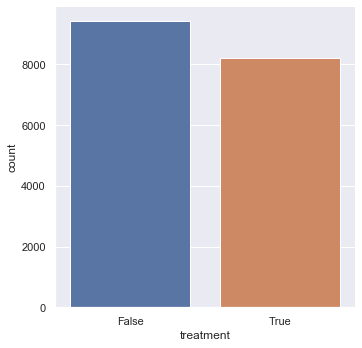

In [4]:
sns.factorplot('treatment',data=datos,kind="count")

In [8]:
interest_cols = [
    'height',
    'weight',
    'age',
    'sistolic',
    'diastolic',
    'heart_rate',
    'pulse_pressure',
    'cardiac_index',
    'systemic_vascular_resistance'
]

En los siguientes gráficos se puede observar las primeras tres componentes principales ploteadas entre si, separando los pacientes que tienen un tratamiento de los que no, en color azul observamos los que no estan recibiendo tratamiento en color naranja los que si, de este análisis no se logra concluir que exista una separación marcada de las clases (tratamiento/ no tratamiento).

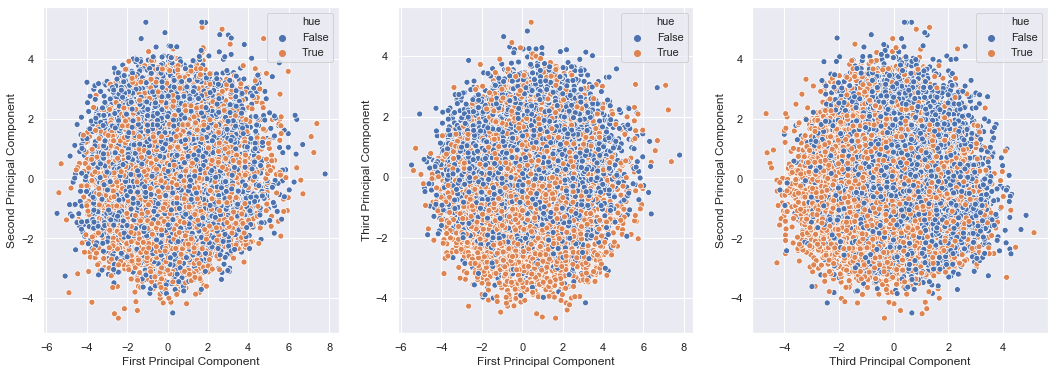

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data_frame_standscaler = pd.DataFrame(StandardScaler().fit_transform(datos[interest_cols]))

pca = PCA()
data_frame_pca = pd.DataFrame(
    pca.fit_transform(data_frame_standscaler),
    index=datos.index
)

data_frame_pca["hue"] = datos["treatment"]
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(18,6))
_ = sns.scatterplot(0,1, data=data_frame_pca, hue='hue', ax=axes[0])
axes[0].set_xlabel('First Principal Component')
axes[0].set_ylabel('Second Principal Component')
_ = sns.scatterplot(0,2, data=data_frame_pca, hue='hue', ax=axes[1])
axes[1].set_xlabel('First Principal Component')
axes[1].set_ylabel('Third Principal Component')
_ = sns.scatterplot(2,1, data=data_frame_pca, hue='hue', ax=axes[2])
axes[2].set_xlabel('Third Principal Component')
axes[2].set_ylabel('Second Principal Component')
plt.show()

Para la construcción del modelo Naive Bayes, iniciamos realizando la separación del data set uno que contiene las variables explicativas y otro que contiene la variables respuesta.

In [10]:
# Extraer las variables independientes 
X = datos.iloc[:,6:]
X.head()

,height,weight,age,smoking,excercise_frecuency,beer,wine,alcohol,strong_licor,sistolic,diastolic,heart_rate,pulse_pressure,cardiac_index,systemic_vascular_resistance
patient_id,,,,,,,,,,,,,,,
30,1.78,102.0,33.854327,0,5,0,0,1,0,120.457143,79.957143,72.685714,41.0,2.3,1158.0
31,1.67,82.4,71.064644,0,2,0,0,1,0,143.405405,91.067568,65.500000,52.0,2.8,1417.0
32,1.70,93.2,57.715030,0,1,0,1,1,0,122.557143,90.257143,80.628571,32.0,3.0,1319.0
33,1.60,61.3,43.645252,0,1,0,0,0,0,145.893939,93.863636,79.787879,52.0,4.2,1353.0
34,1.73,72.3,21.350970,0,1,1,0,1,0,130.376812,82.739130,77.913043,48.0,3.2,1172.0


In [12]:
# Extraemos la variable respuesta "treatment"
Y = pd.DataFrame(datos["treatment"])

,treatment
patient_id,
30,True
31,False
32,True
33,False
34,True


In [13]:
np.shape(Y)

(17644, 1)

Ahora se rediseña la variable respuesta que entrará en el entrenamiento del modelo, de tal forma que para indicar que el paciente recibió un tratamiento (True), tengamos un 1 representandolo y si el paciente no recibió un tratamiento (False) apareza un 0.

In [14]:
#Construir variable respuesta 1 y 0
condiciones = [(Y.treatment == True) , (Y.treatment ==False)]
elecciones = np.array((1,0) , dtype="int8")
Y["treatment"] = np.select(condiciones, elecciones, 0)

Con el fin de entrenar el modelo de Naive Bayes y evaluar si está funcionando bien, se realiza una separación  del conjunto de datos inicial en 2: donde se utilizará un conjunto para el entrenamiento del modelo y conjunto de realizar pruebas sobre el modelo. Para este caso se divide en *80-20* tomando muestras aleatorias, en donde el 80% del conjunto de datos se utilizará para el entrenamiento y el 20% para el testeo.

En este caso de los 17.644 pacientes, 14.115 nos servirán para entrenar el modelo y 3.529 para realizar las validaciones.

In [15]:
# Definición conjuntos de entrenamiento y de prueba 80% - 20%
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=79)

In [17]:
np.shape(y_train)

(14115, 1)

A continuación, se entrena el modelo utilizando la metodología de Naive Bayes. 

In [18]:
# Ajuste Modelo Naives Bayes
from sklearn.naive_bayes import MultinomialNB
NBayes = MultinomialNB().fit(X_train, y_train)
print(NBayes)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


### Análisis del Rendimiento del modelo entrenado.

- Ahora se ajustan los datos del conjunto de entrenamiento con el modelo, para observar el comportamiento y rendimiento que se obtuvo.

In [19]:
# Predicciones conjunto de entrenamiento
ytrain_pred= NBayes.predict(X_train)

A continuación se presentan las siguiente medidas de ajuste:

- Precision = (predicciones acertadas de laclase_x) / (total casos predichos para clase_x)
- Recall        = (predicciones acertadas de la clase_x) / (total de casos existentes en clase_x)
- F1-score    = (2 * precision * recall) / (precision + recall)
- Support   = total casos en cada fila
- Accuracy= indica que tan cerca que se esta del verdadero valor.  
    Accuracy= (TP + TN)/(TP + TN + FP + FN)
    donde: TP = True positive; FP = False positive; TN = True negative; FN = False negative

In [1]:
# Medidas de ajuste Naive Bayes conjunto de entrenamiento
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Matriz de Confusión:')
print(confusion_matrix(y_train,ytrain_pred))
print(classification_report(y_train,ytrain_pred))
print(accuracy_score(y_train, ytrain_pred))

Matriz de Confusión:


NameError: name 'y_train' is not defined

Se observa de los resultados del modelo sobre el set de entrenamiento y vemos que tiene una precisión del 63%, esta prediciendo al 66% de los pacientes que no tienen un tratamiento correctamente y al 60% de los pacientes que si tiene un tratamiento correctamente.


- Ahora se ajustan los datos del conjunto de validación con el modelo, para observar el comportamiento y rendimiento que se obtuvo.

In [21]:
# Predicciones conjunto de prueba
y_pred= NBayes.predict(X_test)

In [22]:
# Medidas de ajuste Naive Bayes conjunto de prueba
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Matriz de Confusión:')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

Matriz de Confusión:
[[1220  711]
 [ 590 1008]]
              precision    recall  f1-score   support

           0       0.67      0.63      0.65      1931
           1       0.59      0.63      0.61      1598

    accuracy                           0.63      3529
   macro avg       0.63      0.63      0.63      3529
weighted avg       0.63      0.63      0.63      3529

0.6313403230376877


Se observa de los resultados del modelo sobre el set de validación y vemos que tiene una precisión del 63%, esta prediciendo al 67% de los pacientes que no tienen un tratamiento correctamente y al 59% de los pacientes que si tiene un tratamiento correctamente.

En conclusion se puede observar que es un modelo bastante estable ya que los resultados obtenidos entre el set de entrenamiento y set de validación son muy congruentes.

